<a href="https://colab.research.google.com/github/Sairindhrijena/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name-**Netflix_Movies_and_TV_Shows_Clustering



*   **Project Type-**Unsupervised
*   **Contribution-**Indivisual



#**Project Summary-**


*   Netflix, is an American subscription streaming service and production company. It was founded in 1997 by Reed Hastings and Marc Randolph in Scott’s Valley, California.
* It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals.



*  Our objective is to conduct an Exploratory Data Analysis to understand what content is available in different countries and if Netflix has been increasingly focusing on TV rather than movies in recent years. And use these insights to cluster similar content by matching text-based features.


*  After loading the data, we start by observing the first and last five values to understand the dataset. Next, we treat the null values by dropping them if the respective variables contain <1% of null values. This is followed by feature engineering to extract new variables from the datetime variable date_added.


*   This cleaned data is then used to conduct EDA in order to understand it better and identify the underlying trends.
*  Once obtained the required insights from the EDA, we start with Pre-processing the text data by removing the punctuation, and, stop words. This filtered data is passed through TF - IDF Vectorizer since we are conducting a text-based clustering and the model needs the data to be vectorized in order to predict the desired results.



*   Finally, K–Means clustering is utilized to form 10 distinct clusters with similar data points.
*  Using the data provided, we also implemented a simple recommender system that successfully generates Ten similar Movies or Tv-Shows for the given title.










# **GitHub Link -**
https://github.com/Sairindhrijena/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement-**




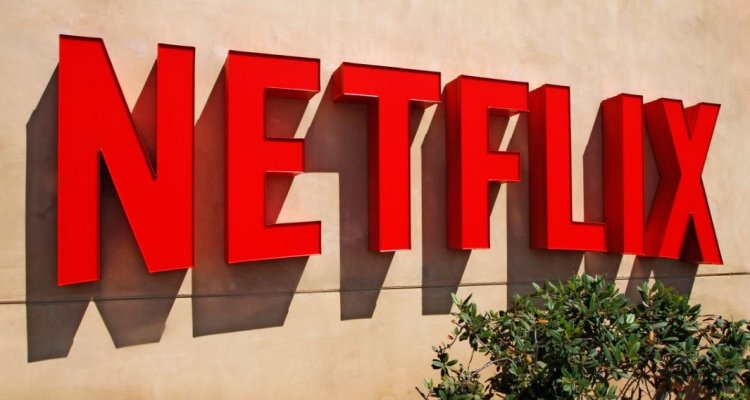


  This dataset consists of tv shows and movies available on Netflix as of 2021. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.



                              
*   Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.
*   In this project, you are required to do Exploratory Data Analysis.


*  Understanding what type content is available in different countries.
*   Is Netflix has increasingly focusing on TV rather than movies in recent years.


*   Clustering similar content by matching text-based features.


##**Let's Begin !**

## **1. Know Your Data**

### **Import Libraries**

In [1]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS ,ImageColorGenerator
import re, string, unicodedata

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import missingno as msno
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

import datetime as dt

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings("ignore")
import warnings;warnings.simplefilter('ignore')
#import stats 
from scipy import stats


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### **Dataset Loading**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT-4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Dataset First View**

In [3]:
# Dataset First Look
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### **Dataset Rows & Columns count**

In [4]:
# Dataset Rows & Columns count
rows=data.shape[0]
columns=data.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

The no of rows is 7787 and no of columns is 12


### **Dataset Information**

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### **Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {data.duplicated().sum()}')

The number of duplicate rows are 0


### **Missing Values/Null Values**

In [7]:
# Missing Values/Null Values Count
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

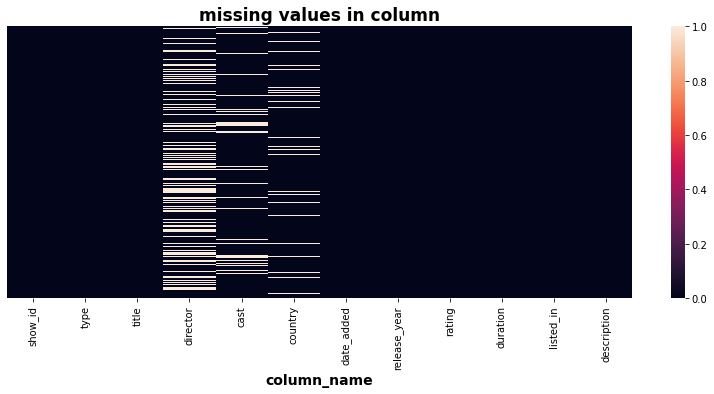

In [8]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### **What did you know about your dataset?**



*  There are 7787 rows and 12 columns in the dataset. In the director, cast, country, date_added, and rating columns, there are missing values. The dataset does not contain any duplicate values.

*  Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values. Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.



##**2. Understanding Your Variables**

In [9]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe(include='all')
     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### **Variables Description**



*   **show_id :**Unique ID for every Movie / Tv Show

*     **type    :**Identifier - A Movie or TV Show

*   **title :**Title of the Movie / Tv Show
* **director :**Director of the Movie


*   **cast :**Actors involved 


*   **country :**Country of production


*  **date_added :** Date it was added on Netflix

*  **release_year:** Actual Releaseyear of the movie / show
*   **rating :**TV Rating of the movie / show


* **duration :**Total Duration - in minutes or number of seasons
***listed_in :** Genere


*   **description :** The Summary description








### **Check Unique Values for each variable**

In [11]:
from pandas.core.base import DataError
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


##**3. Data Wrangling**

###**Data Wrangling Code**

In [12]:
# Write your code to make your dataset analysis ready.
# Top countries
data.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [13]:
# Genre of shows
data.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [14]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['rating'].replace(rating_map,inplace = True)
data['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

In [15]:
# Handling the missing values

# The missing values in the director, cast, and country attributes can be replaced with 'Unknown'
data[['director','cast','country']] = data[['director','cast','country']].fillna('Unknown')

# The missing values in rating can be imputed with its mode, since this attribute is discrete.
data['rating'].fillna(value=data['rating'].mode()[0],inplace=True)
     

In [16]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [17]:
# contry in which a movie was produced
data.country.value_counts()
     

United States     2883
India              956
United Kingdom     577
Unknown            507
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [18]:
# genre of shows
data.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [19]:
# Splitting the duration column, and changing the datatype to integer
data['duration'] = data['duration'].apply(lambda x: int(x.split()[0]))

In [20]:
# Number of seasons for tv shows
data[data['type']=='TV Show'].duration.value_counts()

1     1608
2      382
3      184
4       87
5       58
6       30
7       19
8       18
9        8
10       6
11       3
13       2
12       2
15       2
16       1
Name: duration, dtype: int64

In [21]:
# Movie length in minutes
data[data['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [22]:
# datatype of duration
data.duration.dtype

dtype('int64')

In [23]:
# Converting 'date_added' from string to datetime
data["date_added"] = pd.to_datetime(data['date_added'])

In [24]:
# first and last date on which a show was added on Netflix
data.date_added.min(),data.date_added.max()
     

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [25]:
# Adding new attributes month_added & year_added from date_added column
data['month_added'] = data['date_added'].dt.month
data['year_added'] = data['date_added'].dt.year

# Drop date_added column
data.drop('date_added', axis=1, inplace=True)

In [26]:
# New Dataset Rows & Columns 
data.shape

(7787, 13)

In [27]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7787 non-null   object 
 1   type          7787 non-null   object 
 2   title         7787 non-null   object 
 3   director      7787 non-null   object 
 4   cast          7787 non-null   object 
 5   country       7787 non-null   object 
 6   release_year  7787 non-null   int64  
 7   rating        7787 non-null   object 
 8   duration      7787 non-null   int64  
 9   listed_in     7787 non-null   object 
 10  description   7787 non-null   object 
 11  month_added   7777 non-null   float64
 12  year_added    7777 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 791.0+ KB


###**What all manipulations have you done and insights you found?**



*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.

*   To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show and changed datatype.



* The shows were added on Netflix between 1st January 2008 and 16th January 2021.
*  Now our dataset is completely ready for EDA.





##**4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart - 1 : Type (Univariate)**

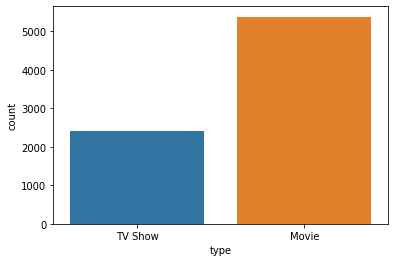

In [28]:
# Chart - 1 visualization code
data['type'].value_counts()

#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(data['type'])
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.


*  To show the count of TV Show and Movie, I have used Countplot.



**2. What is/are the insight(s) found from the chart?**

Netflix has 5377 movies and 2400 TV shows, there are more number movies on Netflix than TV shows.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights help a positive business impact.


*   No, there are no such insights that lead to negative growth.



### **Chart - 2 : Director**

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

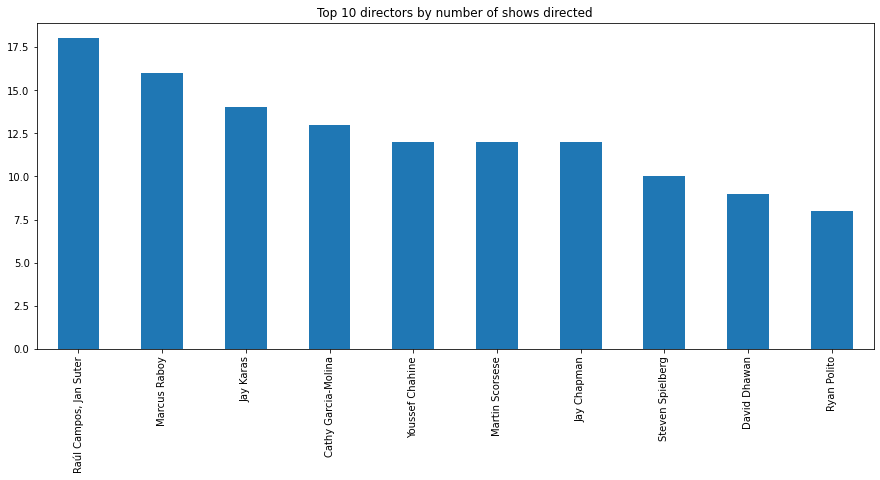

In [29]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(15,6))
data[~(data['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

**1. Why did you pick the specific chart?**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

**2. What is/are the insight(s) found from the chart?**



*   Raul Campos and Jan Suter together have directed 18 movies / TV shows, which is higher than anyone in the top 10 director in dataset.
*   Ryan polito & david dhawan have lowest no of directed movies / TV shows which is 8 & 9 respectively in top 10 director dataset.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth.



### **Chart - 3 : Release year of TV Shows/movies**

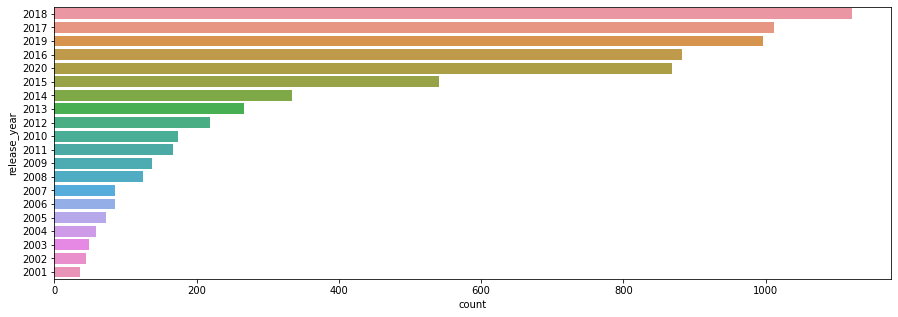

In [30]:
# Chart - 3 visualization code
#Analysing how many movies released per year in last 20 years
movies_year =data['release_year'].value_counts().sort_index(ascending=False)
movies_year[:20]
plt.figure(figsize=(15,5))
sns.countplot(y=data['release_year'],data=data,order=data['release_year'].value_counts().index[0:20])
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.
*  To show the count of release year of Tv show /movies, I have used Countplot.



**2. What is/are the insight(s) found from the chart?**



*   highest number of Tv show /movies released in 2017 and 2018.
*   We saw a huge increase in the number of Tv show /movies after 2015.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth.



### **Chart - 4 : Country**

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

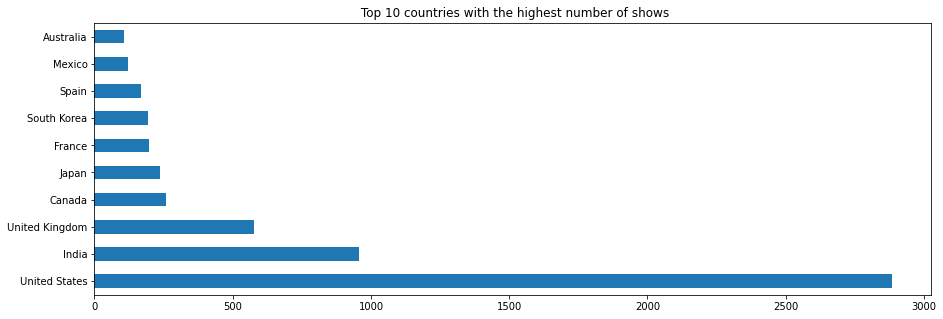

In [31]:
# Chart - 4 visualization code
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(15,5))
data[~(data['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [32]:
# % share of movies / tv shows by top 3 countries
data.country.value_counts().nlargest(3).sum()/len(data)*100

56.709901117246694

In [33]:
# % share of movies / tv shows by top 10 countries
data.country.value_counts().nlargest(10).sum()/len(data)*100

78.33568768460253

**1. Why did you pick the specific chart?**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

**2. What is/are the insight(s) found from the chart?**



*  United States are the top one country of highest number of movies / TV shows in the dataset and then after India & United Kingdom are 2 & 3 Number in dataset
*  Mexico & Australia have 9 & 10 position in Top 10 countries with the highest number of movies / TV shows in the dataset.


*  The top 3 countries together account for about 56% of all movies and TV shows in the dataset.

*  Where the top ten countries together account for about 78% of all movies and TV shows in the dataset.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.



### **Chart - 5 : Release month**

In [34]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


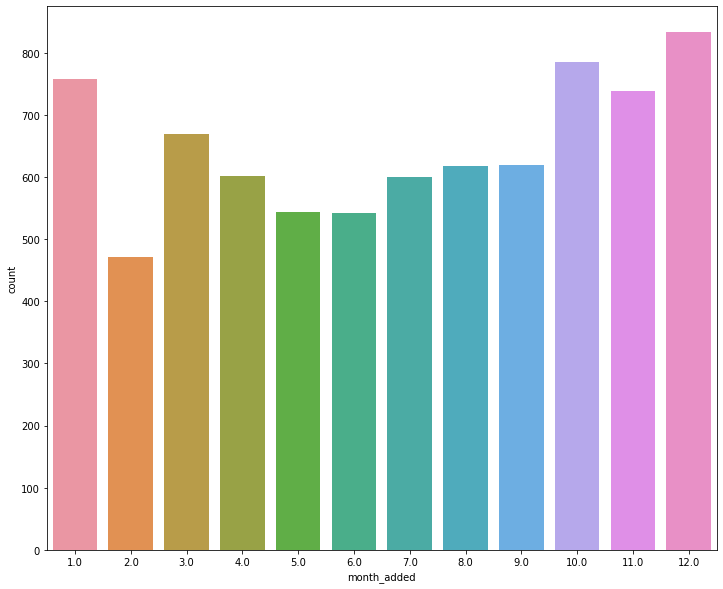

In [35]:
# Chart - 5 visualization code
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot(data['month_added'],data= data)
plt.show()

**1. Why did you pick the specific chart?**



*   Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.


*  To show the count of month , I have used Countplot.



**2. What is/are the insight(s) found from the chart?**

From October to January, maximum number of movies and TV shows were added.

**3. Will the gained insights help creating a positive business impact?**



 Are there any insights that lead to negative growth? Justify with specific reason.


*   No, the gained insights didn't create a positive business impact.


*   No, there are no such insights that lead to negative growth.

### **Chart - 6 : Age**

Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

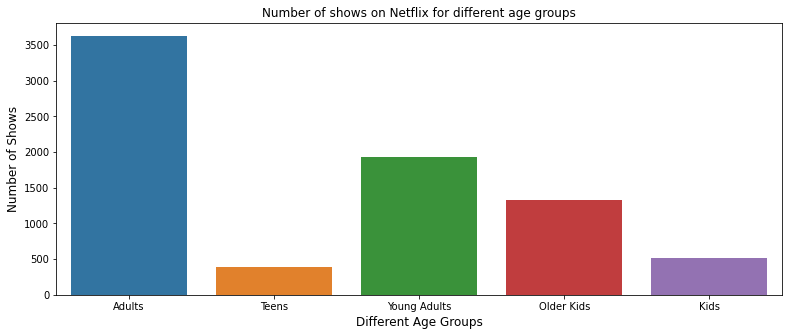

In [36]:
# Chart - 6 visualization code
# Age ratings for shows in the dataset
plt.figure(figsize=(13,5))
sns.countplot(x='rating',data=data)
plt.xlabel('Different Age Groups',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of shows on Netflix for different age groups')
     

**1. Why did you pick the specific chart?**

countplot() method is used to Show the counts of observations in each categorical bin using bars.

**2. What is/are the insight(s) found from the chart?**



*   Adults are the highest number of shows and second highest is Young Adults and third highest is older Kids shows.
*  Teens and kids are less number of shows on netflix as compare to other.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*  Yes, the gained insights didn't create a positive business impact.


*   No, there are no such insights that lead to negative growth.



### **Chart - 7 : Genre**

Text(0.5, 1.0, 'Top 10 genres')

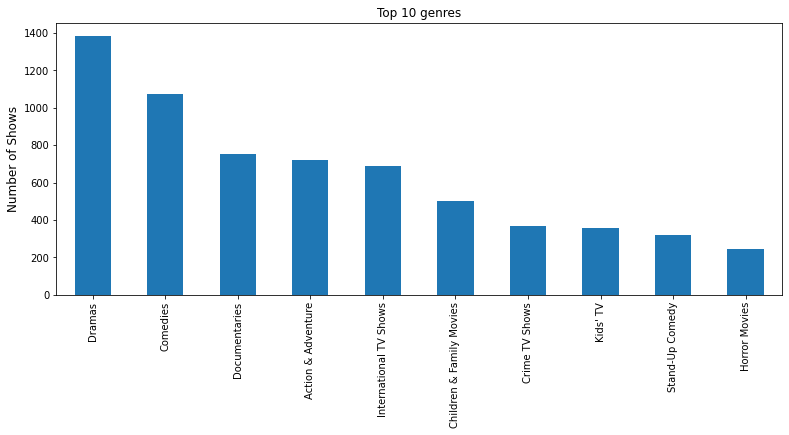

In [37]:
# Chart - 7 visualization code
# Top 10 genres 
plt.figure(figsize=(13,5))
data.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Top 10 genres')

**1. Why did you pick the specific chart?**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

**2. What is/are the insight(s) found from the chart?**



*  The dramas is the most popular genres then comedies genres is second highest and documentries is third highest.


*   Genres of stand up comedy and horror movies are ninth and tenth highest in dataset.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.





*   Yes, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.



### **Chart - 8 : Actors**

Text(0.5, 1.0, 'Top 10 Actors')

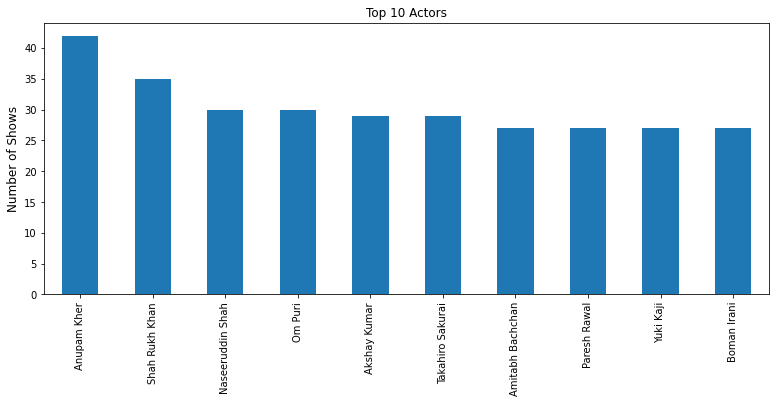

In [38]:
# Chart - 8 visualization code
# seperating actor from cast column
cast =data[~(data['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,5))
cast.value_counts().nlargest(10).plot(kind='bar')
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Top 10 Actors')

**1. Why did you pick the specific chart?**

A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable.

**2. What is/are the insight(s) found from the chart?**



*   Anupam kher play highest role in movie/show where shah rukh khan play secong highest role in movie/show.
*   Paresh rawal, yuki kaji play ninth & tenth highest role in movie/show.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth.



### **Chart - 9 : movies and TV shows added over the years (Bivariate)**

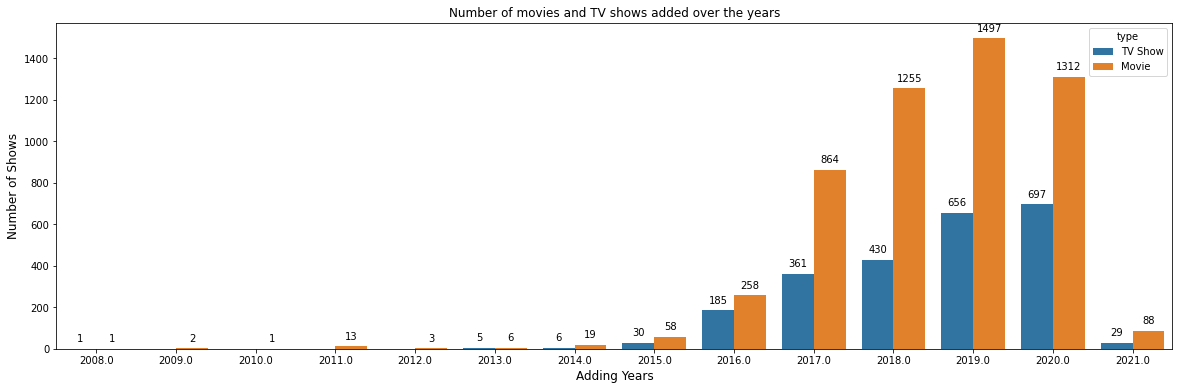

In [39]:
# Chart - 9 visualization code

# Number of movies and TV shows added over the years
plt.figure(figsize=(20,6))
p = sns.countplot(x='year_added',data=data, hue='type')
plt.xlabel('Adding Years',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of movies and TV shows added over the years')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

**1. Why did you pick the specific chart?**

countplot() method is used to Show the counts of observations in each categorical bin using bars.

**2. What is/are the insight(s) found from the chart?**



*  Most of the years have more movies adding as compare to TV shows in Netflix.
*   Also Over the last few years from 2015 to 2021 Netflix has consistently focused on adding more shows in its platform.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth.



### **Chart - 10 : Number of shows since 2008**

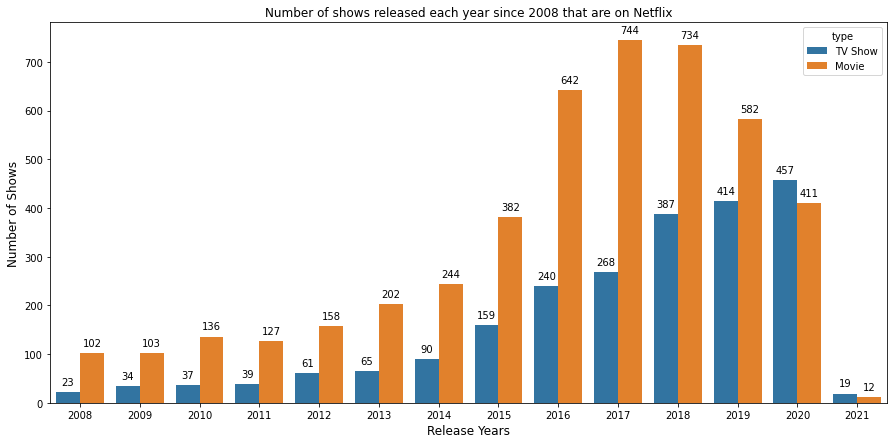

In [40]:
# Chart - 10 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(15,7))
p = sns.countplot(x='release_year',data=data, hue='type',
                  order = order)
plt.xlabel('Release Years',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of shows released each year since 2008 that are on Netflix')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

**1. Why did you pick the specific chart?**

countplot() method is used to Show the counts of observations in each categorical bin using bars.

**2. What is/are the insight(s) found from the chart?**



*   From 2008 to 2018 Number of releaing Movies & TV Shows gradually increasing in each year.



*   from year 2008 to 2019 movies releasing is higher compare to TV shows.
*  Where year of 2017 & 2018 have highest number of releasing movies which is 744 & 734 respectively.


*  Where year of 2019 & 2020 have highest number of releasing TV Show which is 414 and 457 respectively



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*  No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.



### **Chart - 11 : Number of seasons per TV show**

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

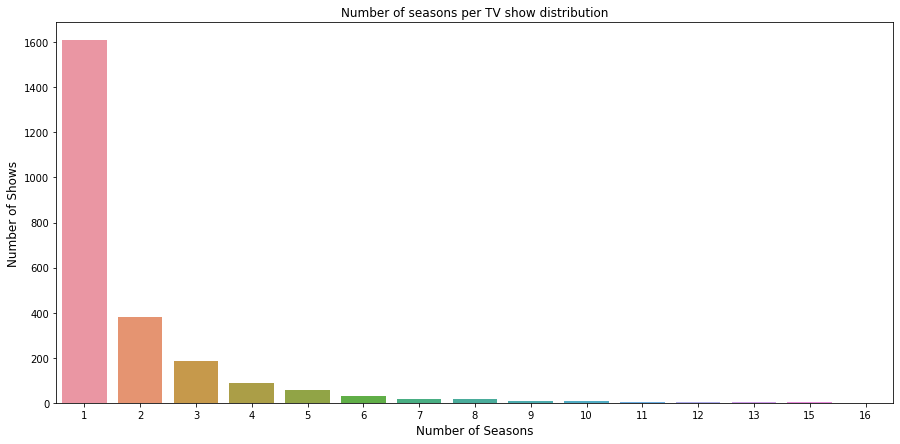

In [41]:
# Chart - 11 visualization code
# Seasons in each TV show
plt.figure(figsize=(15,7))
p = sns.countplot(x='duration',data=data[data['type']=='TV Show'])
plt.xlabel('Number of Seasons',fontsize=12)
plt.ylabel('Number of Shows',fontsize=12)
plt.title('Number of seasons per TV show distribution')

**1. Why did you pick the specific chart?**

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.

**2. What is/are the insight(s) found from the chart?**



*  Total season of tv shows is upto 16.

*   Most of the season of tv shows is one This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.


*   There are very few TV shows that have more than 8 seasons.






**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.





*   No, the gained insights didn't create a positive business impact.


*  No, there are no such insights that lead to negative growth.



### **Chart - 12 : Length distribution of movies**

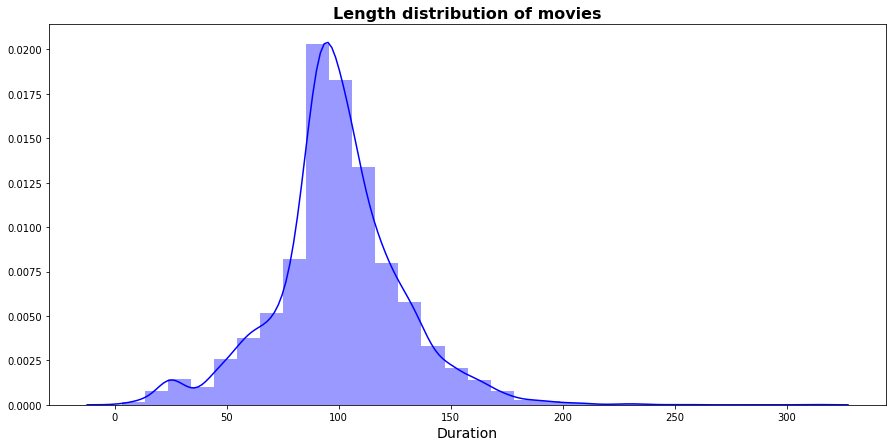

In [42]:
# Chart - 12 visualization code
# Length distribution of movies
movie_df = data[data['type']=='Movie']

plt.figure(figsize=(15, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration', fontsize=14)
plt.show()
     

**1. Why did you pick the specific chart?**

We use a displot (also known as a distribution plot) to represent data in histogram form. It is a univariant set of collected data, which means the data distribution of one variable will be shown against another variable and it represents the overall distribution of continuous data variables.

**2. What is/are the insight(s) found from the chart?**



*  The length of a movie may range from 3 min to 312 minutes.
*   Most of the movie length between 50 to 150 min and there are very less movies hows length is above 200 min hence the distribution is almost normally distributed.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth.



### **Chart - 13 : Actors for TV Shows**

Text(0.5, 1.0, 'Actors who have appeared in highest number of TV Shows')

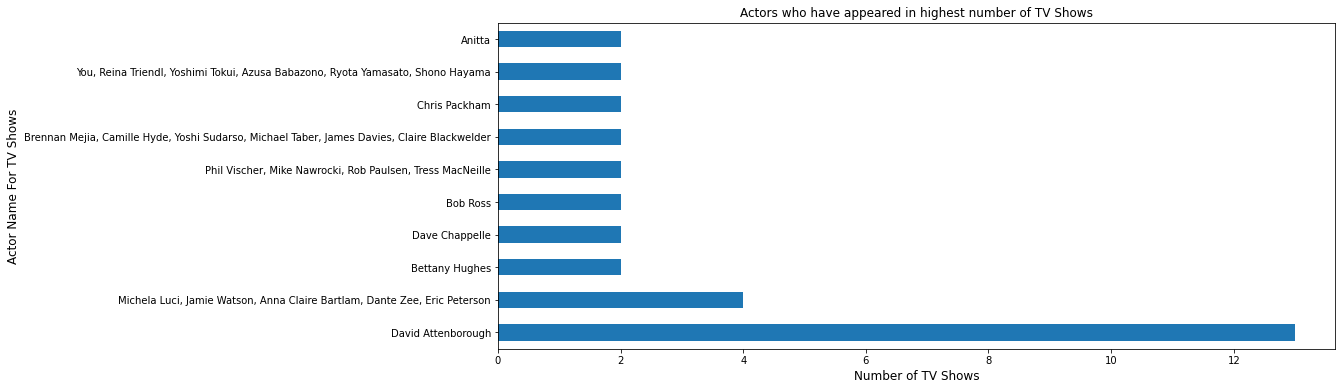

In [43]:
# Chart - 13 visualization code
# Top actors for TV Shows
plt.figure(figsize=(15,6))
data[~(data['cast']=='Unknown') & (data['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('Number of TV Shows',fontsize=12)
plt.ylabel('Actor Name For TV Shows',fontsize=12)
plt.title('Actors who have appeared in highest number of TV Shows')

**1. Why did you pick the specific chart?**

A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

**2. What is/are the insight(s) found from the chart?**



*  David Attenborough has appeared in 13 TV shows, followed by Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson with 4 TV shows.
*   Remaining actors from third to tenth position have equally appeared 2 Tv Shows.



**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.



*  No, the gained insights didn't create a positive business impact.
*  No, there are no such insights that lead to negative growth



### **Chart - 14 - Correlation Heatmap**

Text(0.5, 1.0, 'Heatmap for Netflix')

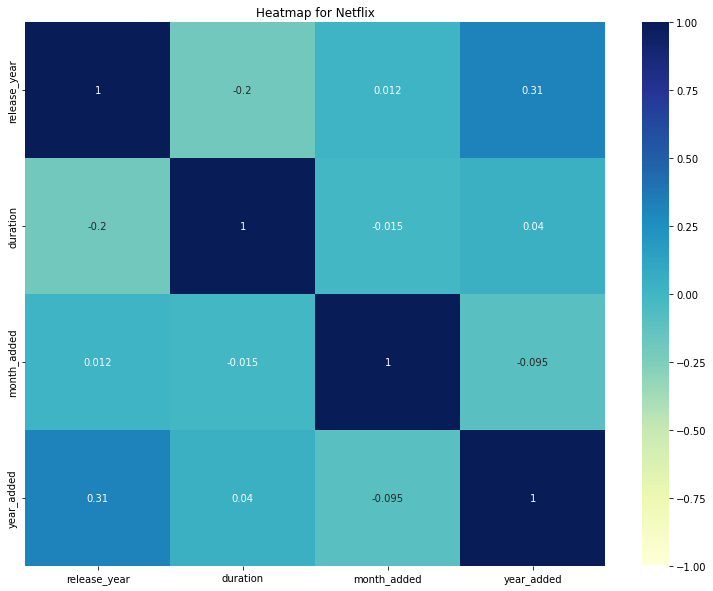

In [44]:
# Correlation Heatmap visualization code
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(method='kendall'), cmap="YlGnBu", annot=True,vmin=-1,vmax=1)
plt.title('Heatmap for Netflix')

**1. Why did you pick the specific chart?**



* A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. * A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].
*   Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.



**2. What is/are the insight(s) found from the chart?**



*  There is no strong correlation found in the data. still we can se release year and duration are negatively correlated. That means, recent movies and got shorter in duration. which is also true.




### **Chart - 15 - Pair Plot**

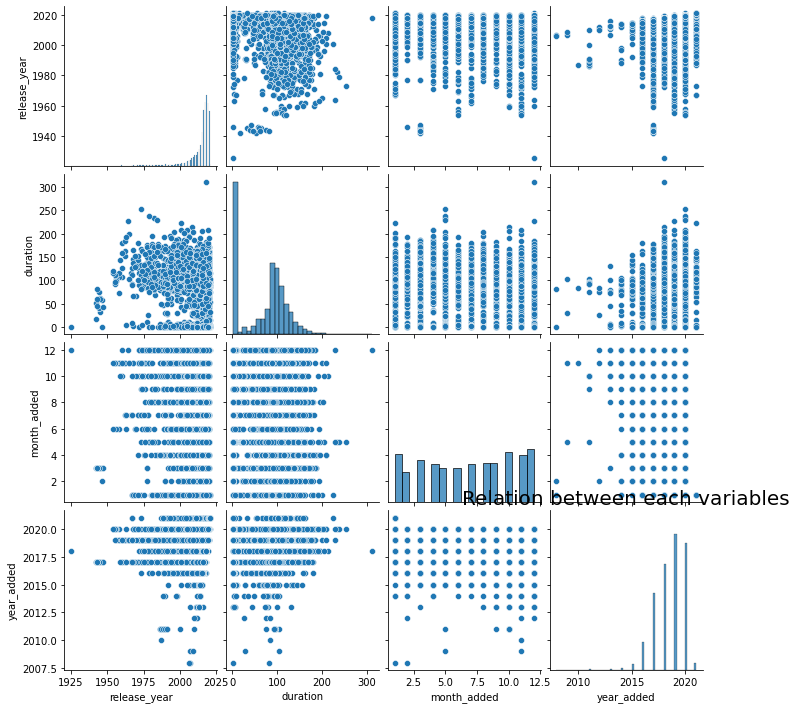

In [45]:
# Pair Plot visualization code
# Commenting this code because it take too much time to run
sns.pairplot(data)
plt.title('Relation between each variables',fontsize=20)
plt.show()

**1. Why did you pick the specific chart?**



*   Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
*   Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.



**2. What is/are the insight(s) found from the chart?**

Here, we can see that the release year is left skewed and month is normally distributed.

### **Chart - 16 - Wordcloud**

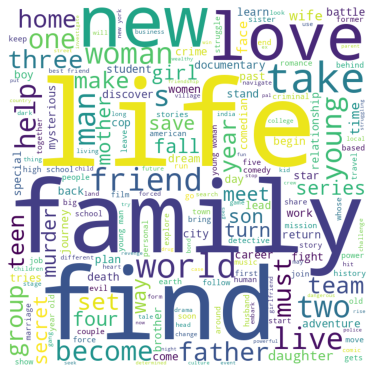

In [46]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

**1. Why did you pick the specific chart?**

Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

**2. What is/are the insight(s) found from the chart?**

Some keywords that come in many times in Netflix show descriptions: life, family, find, new, love, young, world, group, death, man, woman, murder, son, girl, documentary, secret.

##**5. Hypothesis Testing**

### **Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.**



*   Movies rating for kids and older kids are at least two hours long.
*   The duration which is more than 90 minutes are movies.



In [47]:
#Calculation of mean and std
def meanandstd(A,B):
  #mean and std. calutation for a and b variables
  M1 = A.mean()
  S1 = A.std()

  M2= B.mean()
  S2 = B.std()

  return (M1,S1,M2,S2)

In [48]:
#Calculation of t-value
def findtvalue(A,B,M1,S1,M2,S2):
  #length of groups and DOF
  n1 = len(A)
  n2= len(B)

  dof = n1+n2-2

  sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof

  sp = np.sqrt(sp_2)

  #tvalue
  t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
  
  return(dof,t_val)

In [49]:
#making copy of data_clean_frame
data_hypothesis=data.copy()
#head of data_hypothesis
data_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


## **Hypothetical Statement - 1**

### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

HO:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

### **2. Perform an appropriate statistical test.**

In [50]:
#filtering movie from Type_of_show column
data_hypothesis1 = data_hypothesis[data_hypothesis["type"] == "Movie"]

In [51]:
#let's see unique target ages 
data_hypothesis1['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [52]:
#Another category is target_ages (4 classes).
data_hypothesis1['rating'] = pd.Categorical(data_hypothesis1['rating'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
data_hypothesis1['duration']= data_hypothesis['duration'].astype(str).str.extract('(\d+)')
data_hypothesis1['duration'] = pd.to_numeric(data_hypothesis1['duration'])
#head of df_
data_hypothesis1.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0


In [53]:
#group_by duration and rating                 
group_by_= data_hypothesis1[['duration','rating']].groupby(by='rating')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,rating,duration
0,Kids,66.486891
1,Older Kids,92.024648
2,Teens,107.772021
3,Adults,98.230769


In [54]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1.0,2020.0


In [55]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')

In [56]:

# Perform Statistical Test

#Getting mean and std
M1,S1,M2,S2 = meanandstd(A,B)

#Getting t-value
dof,t_value = findtvalue(A,B,M1,S1,M2,S2)
print('-----'*6+f'\nt-value\n'+'-----'*6)
print(t_value)
print('====='*6)


#t-distribution
print('-----'*6+f'\nt-distribution\n'+'-----'*6)
print(stats.t.ppf(0.05,dof))
print(stats.t.ppf(0.95,dof))

------------------------------
t-value
------------------------------
duration   -11.519926
dtype: float64
------------------------------
t-distribution
------------------------------
-1.6462189280971968
1.6462189280971962


Which statistical test have you done to obtain P-Value?



*   Because the t-value is not in the range, the null hypothesis is rejected.
*  As a result, movies rated for kids and older kids are not at least two hours long.



Why did you choose the specific statistical test?
Here , we use t-test instead of z-test because in a t-test is primarily used for research with limited sample sizes whereas a z-test is deployed for hypothesis testing that requires researchers to look at a population size that's larger than 30.

## **Hypothetical Statement - 2**

### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**
HO:The duration which is more than 90 mins are NOT movies.

H1:The duration which is more than 90 mins are movies.

### 2- **Perform an appropriate statistical test.**

In [57]:
data_hypothesis['duration']= data_hypothesis['duration'].astype(str).str.extract('(\d+)')
data_hypothesis['duration'] = pd.to_numeric(data_hypothesis['duration'])
     

In [58]:
data_hypothesis['type'] = pd.Categorical(data_hypothesis['type'], categories=['Movie','TV Show'])
#head of df_
data_hypothesis.head(3)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12.0,2018.0


In [59]:
#group_by duration and TYPE                 
group_by_= data_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group
     

,type,duration
0,Movie,99.307978
1,TV Show,1.775934


In [60]:
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')

In [61]:
# Perform Statistical Test

#Getting mean and std
M1,S1,M2,S2 = meanandstd(A,B)

#Getting t-value
dof,t_value = findtvalue(A,B,M1,S1,M2,S2)
print('-----'*6+f'\nt-value\n'+'-----'*6)
print(t_value)
print('====='*6)


#t-distribution
print('-----'*6+f'\nt-distribution\n'+'-----'*6)
print(stats.t.ppf(0.05,dof))
print(stats.t.ppf(0.95,dof))

------------------------------
t-value
------------------------------
duration    249.818565
dtype: float64
------------------------------
t-distribution
------------------------------
-1.6450493818123495
1.6450493818123488


**Which statistical test have you done to obtain P-Value?**



*   Because the t-value is not in the range, the null hypothesis is rejected.
*  As a result, The duration which is more than 90 mins are movies.



**Why did you choose the specific statistical test?**

Here , we use t-test instead of z-test because in a t-test is primarily used for research with limited sample sizes whereas a z-test is deployed for hypothesis testing that requires researchers to look at a population size that's larger than 30.

##**6. Feature Engineering & Data Pre-processing**

### **1. Handling Missing Values**

In [62]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(data.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
month_added     10
year_added      10
dtype: int64


####**What all missing value imputation techniques have you used and why did you use those techniques?**

There are no missing values to handle in the given dataset.

### **2. Handling Outliers**

Not Needed.

### **3. Textual Data Preprocessing**

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc. There are different steps in text pre-processing like - removing stopwords and punctuations , stemming of words etc. Let us start the preprocessing task.

####**1. Expand Contraction**

In [63]:
data_cluster = data.copy()
# Expand Contraction
# Combining all the clustering attributes into a single column

data_cluster['clustering'] = (data_cluster['director'] + ' ' + 
                                data_cluster['cast'] +' ' + 
                                data_cluster['country'] +' ' + 
                                data_cluster['listed_in'] +' ' + 
                                data_cluster['description'])
     

In [64]:
# Select the 100 number of clusters for the dataset 
data_cluster['clustering'][7782]

"Josef Fares Imad Creidi, Antoinette Turk, Elias Gergi, Carmen Lebbos, Viktor Axelsson, Charbel Iskandar, Yasmine Awad Sweden Dramas When Lebanon's Civil War deprives Zozo of his family, he's left with grief and little means as he escapes to Sweden in search of his grandparents."

####**2. Lower Casing**

In [65]:
# Lower Casing
# we will convert all words in lowercase
data_cluster['clustering'] = data_cluster['clustering'].str.lower()

In [66]:
# Select the 100 number of clusters for the dataset 
data_cluster['clustering'][7782]

"josef fares imad creidi, antoinette turk, elias gergi, carmen lebbos, viktor axelsson, charbel iskandar, yasmine awad sweden dramas when lebanon's civil war deprives zozo of his family, he's left with grief and little means as he escapes to sweden in search of his grandparents."

####**3. Removing Punctuations**

We need to carefully choose the list of punctuation which we are going to discard based on the use case.To remove punctuation let's create a function and apply them on our variables

In [67]:
# Remove Punctuations
def remove_punct(text):
  ''' a function for removing punctuation'''
  import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks
  translator=str.maketrans('','',string.punctuation)
    # return the text stripped of punctuation marks
  return text.translate(translator)

In [68]:
#applying function
data_cluster['clustering'] = data_cluster['clustering'].apply(remove_punct)
data_cluster['clustering'][7782]

'josef fares imad creidi antoinette turk elias gergi carmen lebbos viktor axelsson charbel iskandar yasmine awad sweden dramas when lebanons civil war deprives zozo of his family hes left with grief and little means as he escapes to sweden in search of his grandparents'

### **4. Removing URLs & Removing words and digits contain digits.**

In [69]:
# Remove URLs & Remove words and digits contain digits
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [70]:
# remove non-ascii characters
data_cluster['clustering']= remove_non_ascii(data_cluster['clustering'])

In [71]:
# Select the 100 number of clusters for the dataset 
data_cluster['clustering'][0]

'unknown joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil international tv shows in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

####**5. Removing Stopwords & Removing White spaces**

With english, among many popular languages, stop words are common words within sentences that do not add value and thus can be eliminated when cleaning for NLP prior to analysis.We will make good use of the NLTK library by importing the pre-programmed english stop words library.



In [72]:
# extracting the stopwords from nltk library
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

sw = stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [73]:
# Remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text=[word.lower() for word in text.split() if word not in sw]
  # joining the list of words with space separator
  return ' '.join(text)

In [74]:
# Remove White spaces
#applying function
data_cluster['clustering'] = data_cluster['clustering'].apply(remove_stopwords)
data_cluster['clustering'][7782]   

'josef fares imad creidi antoinette turk elias gergi carmen lebbos viktor axelsson charbel iskandar yasmine awad sweden dramas lebanons civil war deprives zozo family hes left grief little means escapes sweden search grandparents'

### **6. Text Normalization**

In [75]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [76]:
# Lemmatization
data_cluster['clustering'] = lemmatize_verbs(data_cluster['clustering'])

In [77]:
# Select the 100 number of clusters for the dataset 
data_cluster['clustering'][0]

'unknown joao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil international tv shows future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

Which text normalization technique have you used and why?

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

####**7. Tokenization**

In [78]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [79]:
# Create text column based on dataset
data_cluster['clustering'] = data_cluster['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [80]:
# Select the 100 number of clusters for the dataset 
print(data_cluster['clustering'][7782])

['josef', 'fares', 'imad', 'creidi', 'antoinette', 'turk', 'elias', 'gergi', 'carmen', 'lebbos', 'viktor', 'axelsson', 'charbel', 'iskandar', 'yasmine', 'awad', 'sweden', 'dramas', 'lebanons', 'civil', 'war', 'deprives', 'zozo', 'family', 'hes', 'left', 'grief', 'little', 'means', 'escapes', 'sweden', 'search', 'grandparents']


####**8. Text Vectorization**

In [81]:
# Vectorizing Text
# clustering tokens saved in a variable
clustering_vectorization = data_cluster['clustering']

In [82]:
# Tokenization
def tokenizer(text):
  return text
  
# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [83]:
# Dataset Rows & Columns count
x.shape

(7787, 20000)

In [84]:
# convert X into array form for clustering
X = x.toarray()

# Check the matrix
X   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

###**7. Dimesionality Reduction**

**Do you think that dimensionality reduction is needed? Explain Why?**

Dimensionality reduction brings many advantages to your machine learning data, including: Fewer features mean less complexity. You will need less storage space because you have fewer data. Fewer features require less computation time.

In [85]:
# DImensionality Reduction (If needed)
# using PCA to project data to lower dimensional space

pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

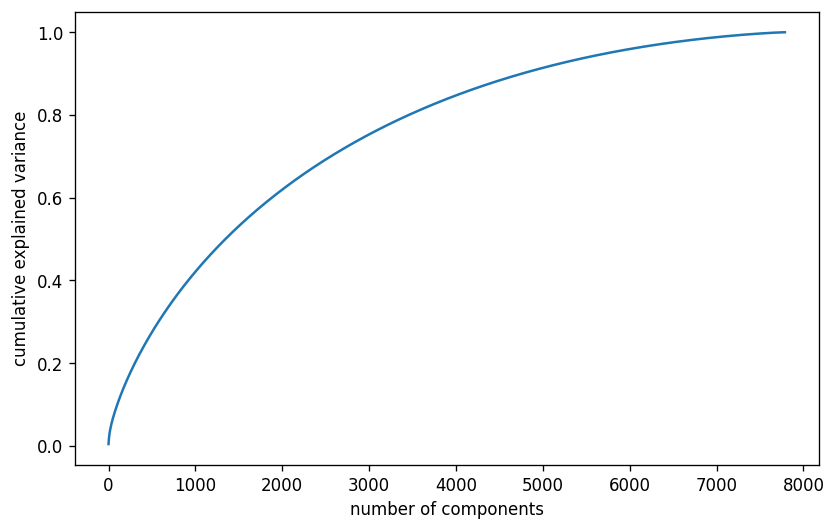

In [86]:
# Explained variance for different number of components
plt.figure(figsize=(8,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()



*   We can see from the above plot almost 95% of the variance can be explained by 5000 components.
*  Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.



In [87]:
# reducing the dimensions to 6000 using pca
pca = PCA(n_components=0.95,random_state=42)
pca.fit(X)

PCA(n_components=0.95, random_state=42)

In [88]:
# transformed features
X_pca= pca.transform(X)
     
# shape of transformed vectors
X_pca.shape

(7787, 5756)

**Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**



*  We can use PCA (Principal component Analysis) to reduce the dimensionality of data.
*   We have prepared and scaled our data set for applying the ML models, our dataset doesn't have any target variable to predict, and as given in the problem statement we have to apply some Unsupervised Machine learning models to make some clusters out from the dataset.



##**7. ML Model Implementation**

### **ML Model - 1 : K-Means Clustering**

K-means clustering uses “centroids”, K different randomly-initiated points in the data, and assigns every data point to the nearest centroid. After every point has been assigned, the centroid is moved to the average of all of the points assigned to it.Let's go ahead and import important tools to apply K-mean clustering

In [89]:
# importing required modules from sklearn library
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

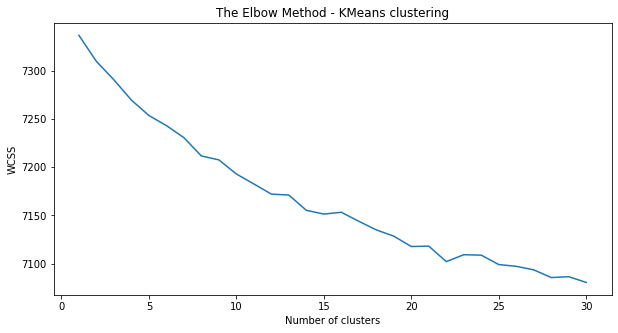

In [90]:
#Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


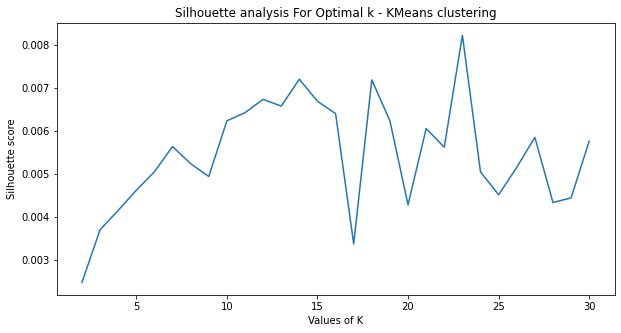

In [91]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()
     

In [92]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=40)
kmeans.fit(X_pca)

KMeans(n_clusters=4, random_state=40)

In [93]:
# Adding a kmeans cluster number attribute
data_cluster['kmeans_cluster'] = kmeans.labels_

In [94]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(7270.468718441814, 0.003917753064020758)


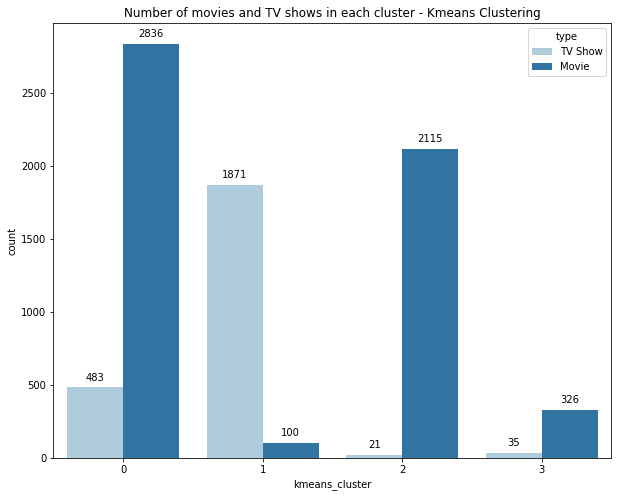

In [95]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,8))
q = sns.countplot(x='kmeans_cluster',data=data_cluster, hue='type',palette='Paired')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

In [96]:
from wordcloud import WordCloud, STOPWORDS

# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in data_cluster[data_cluster['clustering']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
     


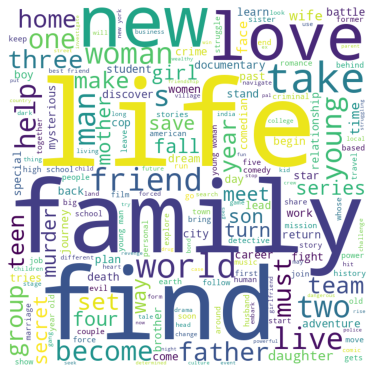

In [97]:
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)  

## **ML Model - 2 : Hierarchical clustering**

Hierarchical clustering is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.The hierarchical clustering technique has two approaches:





*   Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.


*   Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

How it works?




*  The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix.
*  Then selects the two closest clusters and merges them into a single cluster.


*   Above process is repeated until all the samples are in the same cluster.

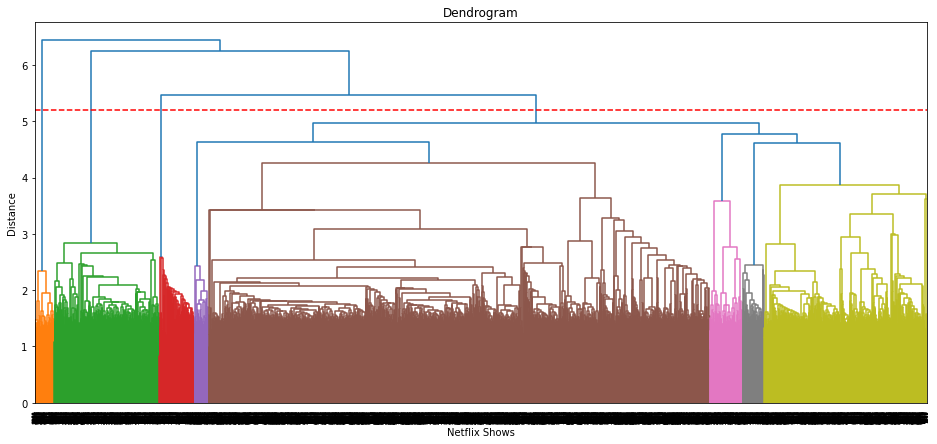

In [98]:
# Building a dendogram to decide on the number of clusters

plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 5.2, color='r', linestyle='--')

In [99]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X_pca)

array([1, 1, 0, ..., 0, 0, 0])

In [100]:
# Adding a kmeans cluster number attribute
data_cluster['hierarchical_cluster'] = hierarchical.labels_

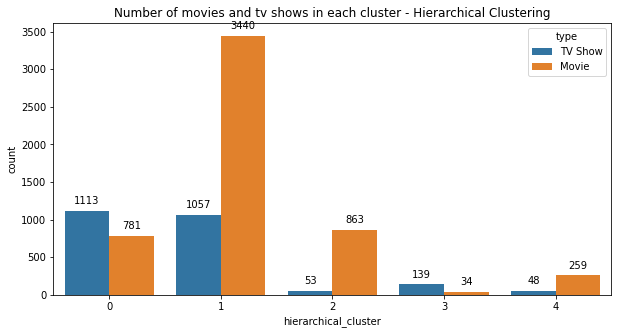

In [101]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=data_cluster, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
     

In [102]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in data_cluster[data_cluster['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

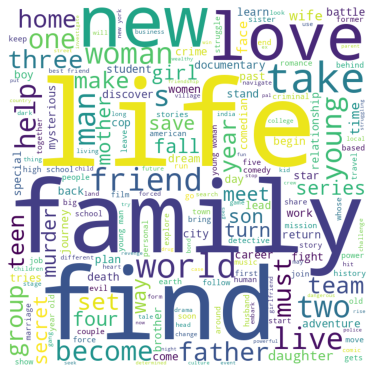

In [103]:
# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
     

##**ML Model - 3 : Content based recommender system**

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.





*   We can build a simple content based recommender system based on the similarity of the movie/shows.


*  If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.


*   To get the similarity score of the shows, we can use cosine similarity.
*   The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the cosine similarity score of two vectors increases as the angle between them decreases.




In [104]:
# Changing the index of the df from show id to show title
data_cluster['show_id'] = data_cluster.index
     

In [105]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

data_cluster['clustering'] = data_cluster['clustering'].apply(lambda x: convert(x))
     

In [106]:
# setting title of movies/Tv shows as index
data_cluster.set_index('title',inplace=True)

In [107]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(data_cluster['clustering'])

In [109]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)
     

In [110]:
# Dataset Rows & Columns count
cosine_similarity.shape

(7787, 7787)

In [111]:
# cosine_similarity rows and columns
cosine_similarity.shape
     

(7787, 7787)

In [112]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(data_cluster.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(data_cluster.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [113]:
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'My Mister',
 'Illang: The Wolf Brigade',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [114]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

If you liked 'Lucifer', you may also enjoy:



['Rica, Famosa, Latina',
 'Exhibit A',
 'Trial By Media',
 'Women Behind Bars',
 'Inside the Criminal Mind',
 'Cold Case Files',
 'Trial 4',
 'The Confession Tapes',
 'Terrorism Close Calls',
 'Making a Murderer']

In [115]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Living Undocumented',
 'Haunted',
 'Drug Lords',
 'Million Dollar Beach House']

## **Conclusion**



*   In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.


*  The dataset contained about 7787 records, and 12 attributes.



*   We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).



*   It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.

*   It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

*   Through TFIDF Vectorization, we created a total of 20000 attributes.


*   We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.


*   We first built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.


*  Then clusters were built using the Agglomerative hierarchical clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.


*  A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.





## ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***